In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('../../sigma_opt.csv')
print(data.head())
print(data.shape)

data_tags = data[(data['type'] == 'tags') & (data['pb_count'] > 0)]
data_desc = data[(data['type'] == 'descriptions') & (data['pb_count'] > 0)]

   id      code          type  sigma  pb_count
0   9  1a0b8840  descriptions   0.05         5
1  15  271fe68b  descriptions   0.03         1
2   7  fc331457  descriptions   0.02         2
3  15  a95da1c3  descriptions   0.06         1
4  13  da6ecee2  descriptions   0.03         0
(41, 5)


In [ ]:
print(data_desc)
data_desc_gp = data_desc.groupby('sigma')['pb_count'].mean()

print(data_desc_gp)

    id      code          type  sigma  pb_count
0    9  1a0b8840  descriptions   0.05         5
1   15  271fe68b  descriptions   0.03         1
2    7  fc331457  descriptions   0.02         2
3   15  a95da1c3  descriptions   0.06         1
5   29  c4c6ebc7  descriptions   0.06         5
7   21  ef9354fc  descriptions   0.06         5
8    5  d883670f  descriptions   0.02         5
12  27  26ee62a0  descriptions   0.05         3
14  17  b9b4ea5b  descriptions   0.03         4
15  17  f2f88034  descriptions   0.04         1
17   7  6447f251  descriptions   0.02         5
18   5  a7bc656a  descriptions   0.03         1
sigma
0.02    4.000000
0.03    2.000000
0.04    1.000000
0.05    4.000000
0.06    3.666667
Name: pb_count, dtype: float64


In [11]:
print(data_tags)
data_tags_gp = data_tags.groupby('sigma')['pb_count'].mean()

print(data_tags_gp)

    id      code  type  sigma  pb_count
20  18  d1d26f54  tags   0.08         5
21   6  d4ff6c6c  tags   0.08         3
22  30  d4f0da1f  tags   0.09         5
23   8  095dea75  tags   0.09         5
24  18  83310e26  tags   0.09         2
27  22  8c1e92b7  tags   0.10         5
30  20  fd3bc2c7  tags   0.11         5
31   6  5219f037  tags   0.11         3
32   4  407563a4  tags   0.11         4
35  24  bb21acd9  tags   0.11         5
38  28  974c4aea  tags   0.12         5
40  26  b1519eeb  tags   0.12         5
sigma
0.08    4.00
0.09    4.00
0.10    5.00
0.11    4.25
0.12    5.00
Name: pb_count, dtype: float64


             sigma  pb_count
sigma     1.000000  0.273905
pb_count  0.273905  1.000000


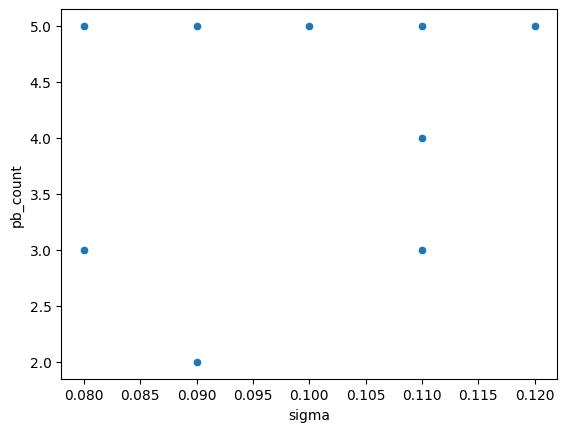

In [ ]:
print(data_tags[['sigma', 'pb_count']].corr(method='pearson'))
sns.scatterplot(x=data_tags['sigma'], y=data_tags['pb_count'])
plt.show()

             sigma  pb_count
sigma     1.000000  0.095951
pb_count  0.095951  1.000000


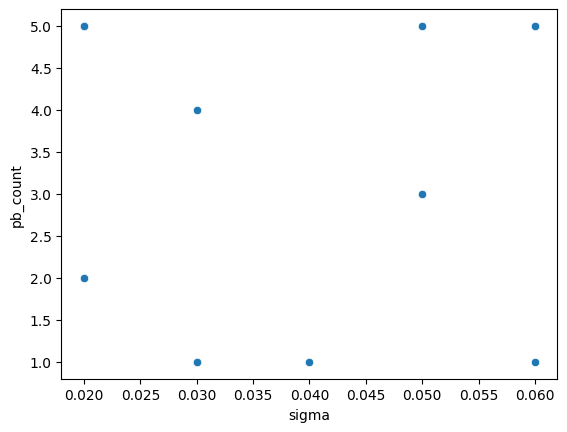

In [30]:
print(data_desc[['sigma', 'pb_count']].corr(method='pearson'))
sns.scatterplot(x=data_desc['sigma'], y=data_desc['pb_count'])
plt.show()

In [15]:
X = sm.add_constant(sigma)
y = picked_books

model = sm.OLS(y, X).fit()

In [16]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.2799
Date:                Sun, 06 Apr 2025   Prob (F-statistic):              0.600
Time:                        22:03:23   Log-Likelihood:                -90.357
No. Observations:                  41   AIC:                             184.7
Df Residuals:                      39   BIC:                             188.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8125      0.804      2.254      0.0